# Project: St. Maarten Price Data Forecast

<p>A project to explore St. Maarten's CPI product price data create visualizations of the data and use time series modeling algorithms to forecast the missing year of 2018.</p>

## Data Loading & Package Setup

In [37]:
# Importing required libbrairies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
# Loading titanic data set & intial preview. 
# Create Dirty multi-machine file path loads.
M_PATH = ['/home/m0linux/Documents/projects/St.Maarten_CPI_Product_Price_Forecast/data/cpi_sxm _2001_2016.csv']
df = pd.read_csv(M_PATH[0], sep = ';')


### Data transformations

In [39]:
# Missing Values Check
display(df.isnull().sum())

Expenditure category    0
2000                    0
2001                    0
2002                    0
2003                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    0
2016                    0
2017                    0
dtype: int64

In [40]:
# Drop Data Classifiers and Totals
df_drop_classif = df.drop(index= [0,1,11,14,17,23,31,33,38,44] )
df_drop_classif_column = df_drop_classif.drop(columns= ['Expenditure category'] )

In [41]:

# Replace ',' for '.' allowing objects to be converted to numeric-float values
columns = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016','2017']
columns_b = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016','2017']

# Replace currency "," --> '.' for conversion to float data type
for col in columns:
    df_drop_classif_column[col] = df_drop_classif_column[col].str.replace(',','.')
    df_drop_classif_column[col] = df_drop_classif_column[col].astype(float)

for col_b in columns_b:
    df_drop_classif[col_b] = df_drop_classif[col_b].str.replace(',','.')
    df_drop_classif[col_b] = df_drop_classif[col_b].astype(float)
    

df = df_drop_classif_column

In [42]:
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis

#### Data Overview & Statistical Summary

In [43]:
# Descriptive summary, sata types and data column and feature count using shape.
# Data Type Check
display(df.dtypes)

# Data Shape Check
display(df.shape)

# Statistical Overview Check
display(df.describe())


2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object

(38, 18)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,91.352105,92.104474,92.302368,93.426316,94.658158,97.533421,99.706053,101.836842,108.015789,111.712895,114.303684,120.231053,128.246053,135.185789,138.581842,145.376053,142.385526,146.065526
std,11.093785,10.583208,8.502278,7.403602,6.347285,4.178342,2.284645,3.745731,9.798222,11.776113,13.722210,21.298255,28.467594,43.968323,47.888182,53.721036,53.226417,57.048060
min,68.090000,70.440000,75.270000,76.960000,79.120000,82.660000,93.740000,99.000000,96.560000,96.860000,96.330000,72.780000,71.500000,71.500000,71.500000,71.500000,71.500000,71.500000
25%,83.825000,85.687500,86.135000,88.772500,91.112500,95.107500,99.130000,100.000000,101.635000,102.542500,103.892500,104.405000,109.445000,109.820000,110.957500,112.395000,107.350000,108.350000
50%,92.130000,93.400000,94.995000,95.605000,96.910000,98.675000,99.940000,100.750000,105.225000,108.550000,109.530000,115.815000,120.855000,123.215000,124.235000,128.840000,124.340000,127.890000
75%,99.925000,99.910000,99.602500,99.715000,100.000000,100.000000,100.000000,101.700000,111.962500,117.575000,123.142500,129.840000,143.982500,148.152500,153.647500,162.785000,167.327500,174.852500
max,114.810000,114.490000,104.210000,104.200000,104.250000,109.550000,110.920000,118.800000,143.560000,149.580000,147.790000,171.080000,206.580000,338.750000,354.830000,354.820000,362.210000,371.470000


####  Outlier Detection & Removal

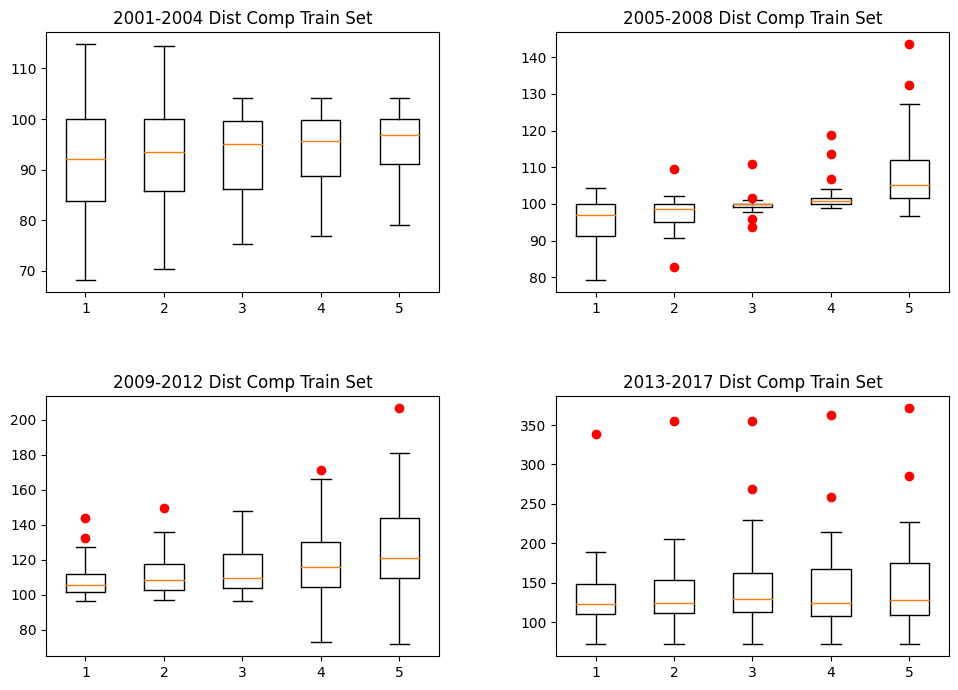

In [44]:
# Outlier Visual Detection
fig, axs = plt.subplots(2,2)

axs[0,0].set_title('2001-2004 Dist Comp Train Set')
axs[0,0].boxplot(df[['2000','2001','2002','2003','2004']],0,'r')

axs[0,1].set_title('2005-2008 Dist Comp Train Set')
axs[0,1].boxplot(df[['2004','2005','2006','2007','2008']],0,'r')

axs[1,0].set_title('2009-2012 Dist Comp Train Set')
axs[1,0].boxplot(df[['2008','2009','2010','2011','2012']],0,'r')

axs[1,1].set_title('2013-2017 Dist Comp Train Set')
axs[1,1].boxplot(df[['2013','2014','2015','2016','2017']],0,'r')


fig.subplots_adjust(left=0.09, right=1.5, bottom=0.1, top= 1.4, hspace=0.4, wspace= 0.3)


plt.show()

##### IQR Filtering


In [45]:
# Interquarentile Range (IQR) Based Filtering

percentile25 = df.quantile(0.25)
percentile75 = df.quantile(0.75)

iqr = percentile75 - percentile25

upper_limits = percentile75 + 1.5 * iqr
lower_limits = percentile25 - 1.5 * iqr

# Linear Interpolation for missing data (Outliers)
data_no_outliers = df[(df >= lower_limits) & (df <= upper_limits)]
data_no_outliers_interp = data_no_outliers.interpolate(method='linear', order= 2)

# Missing Values Check
display(data_no_outliers_interp.isnull().sum())



2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

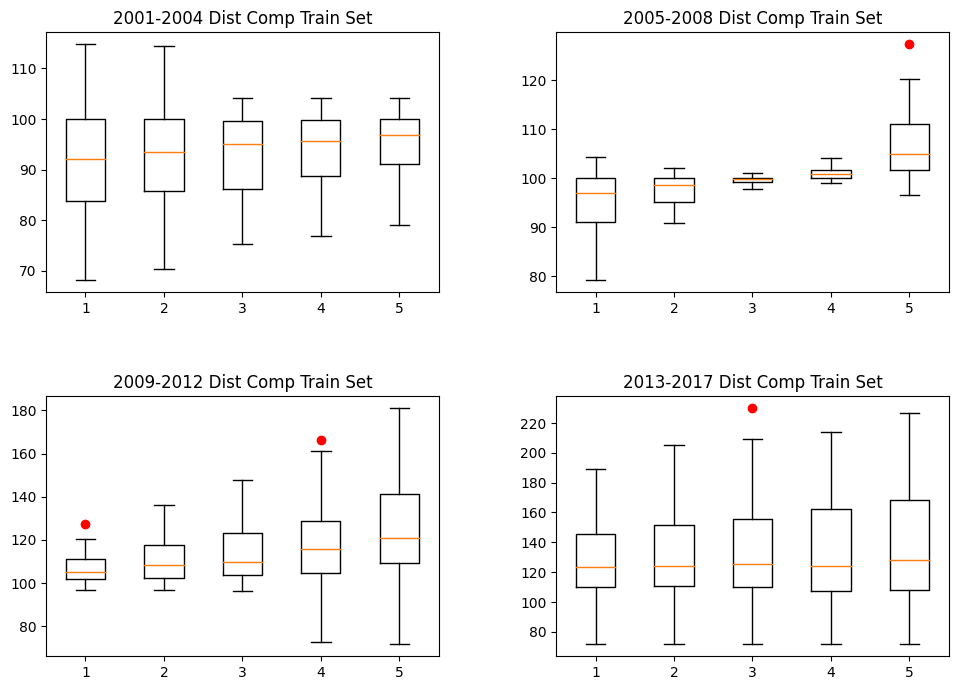

In [46]:
# Outliers Removed Comp

fig1, axs1 = plt.subplots(2,2)

axs1[0,0].set_title('2001-2004 Dist Comp Train Set')
axs1[0,0].boxplot(data_no_outliers_interp[['2000','2001','2002','2003','2004']],0,'r')
axs1[0,1].set_title('2005-2008 Dist Comp Train Set')
axs1[0,1].boxplot(data_no_outliers_interp[['2004','2005','2006','2007','2008']],0,'r')
axs1[1,0].set_title('2009-2012 Dist Comp Train Set')
axs1[1,0].boxplot(data_no_outliers_interp[['2008','2009','2010','2011','2012']],0,'r')
axs1[1,1].set_title('2013-2017 Dist Comp Train Set')
axs1[1,1].boxplot(data_no_outliers_interp[['2013','2014','2015','2016','2017']],0,'r')


fig1.subplots_adjust(left=0.09, right=1.5, bottom=0.1, top= 1.4, hspace=0.4, wspace= 0.3)


plt.show()

## Transformations

### Data transformation & processing

In [47]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.tools import diff

##### Reshaping Data (Stats Models)

In [48]:
# Transforming data for stats model time index requirment
transform = pd.melt(data_no_outliers_interp).rename(columns= {'variable':'Date', 'value':'Prices'})
transform['Date'] = pd.to_datetime(transform['Date'], format= '%Y')
df_stm_train = transform

###### Differencing (Stats Models)

In [49]:
# Dataset with Log Transfomration applied for stationarity.
log_transformed_data = np.log(df_stm_train['Prices'])

# Dataset with differencing applied for stationarity.
fo_diff = diff(log_transformed_data)

In [50]:
series = fo_diff

#### Autocorrolation Function (AFC) & Partial Autocorrolation Function (PAFC) Investigative Plots


In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

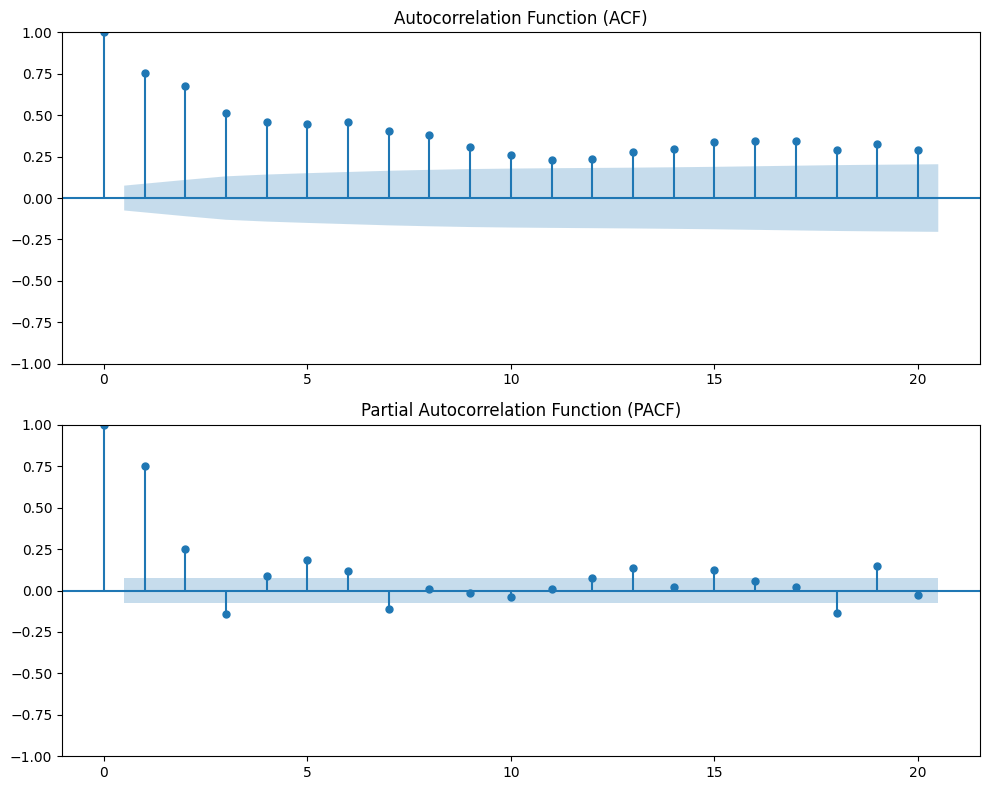

In [52]:
# Plot the ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot
plot_acf(df_stm_train['Prices'], lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_stm_train['Prices'], lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#### Augmented Dickey-Fuller (ADF)

In [53]:

def adf_test(series):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(series)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "# of Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                -9.858101e+00
p-value                        4.305221e-17
# of Lags Used                 1.900000e+01
Number of Observations Used    6.630000e+02
Critical Value (1%)           -3.440252e+00
Critical Value (5%)           -2.865909e+00
Critical Value (10%)          -2.569097e+00
dtype: float64


#### Auto_Arima Package testing

In [54]:
from pmdarima.arima import auto_arima

# Testing the Auto Arima for order detection
model = auto_arima(df_stm_train['Prices'], trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)
display("Best Model Order", model.order)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=5907.207, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=5829.547, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=5831.285, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=5823.217, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=5819.417, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=5822.244, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=5820.769, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=5806.228

'Best Model Order'

(5, 1, 0)

## Machine Learning Models

#### Statistical Modeling Algorithm

In [55]:
from statsmodels.tsa.arima.model import ARIMA

##### Autoregressive Integrated Moving Average  (ARIMA)


In [56]:
ARIMA_model = ARIMA(df_stm_train['Prices'], order=(5,1,1))
ARIMA_model_fit = ARIMA_model.fit()

In [57]:
train_size = int(len(df_stm_train) * 0.8)
train_data = df_stm_train.iloc[:train_size]
test_data = df_stm_train.iloc[train_size:]
display(len(test_data))

137

In [58]:
forecast_values = ARIMA_model_fit.forecast(steps=len(test_data))

In [59]:
forecast_horizon = 39  # Adjust as needed
train_forecast = ARIMA_model_fit.forecast(steps=len(test_data))

In [60]:
forcast_2018 = ARIMA_model_fit.forecast(steps=forecast_horizon) 
display(forcast_2018)


684    132.910048
685    128.533590
686    117.386900
687    118.142862
688    115.162804
689    124.579258
690    123.007163
691    126.051298
692    122.726754
693    122.271472
694    120.606438
695    121.971901
696    121.776526
697    123.153605
698    122.562639
699    122.749858
700    122.098488
701    122.224378
702    122.057547
703    122.401027
704    122.335970
705    122.492491
706    122.333208
707    122.356623
708    122.263002
709    122.324978
710    122.307504
711    122.365644
712    122.339161
713    122.354884
714    122.323930
715    122.333512
716    122.322470
717    122.337530
718    122.333319
719    122.341133
720    122.334019
721    122.336295
722    122.331541
Name: predicted_mean, dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for the testing set
mse = mean_squared_error(test_data['Prices'], forecast_values)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 34.98411131940719
